Importing the libraries and dataset

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, roc_curve, recall_score, precision_score

Data exploration

In [53]:
data = pd.read_csv("E:\\UPIfrauddetection_Project\\Fraud_Detection.csv")
 

In [54]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [55]:
data.shape

(6362620, 11)

In [56]:
data.rename(columns={'nameOrig':'customer_starting_transaction','oldbalanceOrg':'bal_before_transaction','newbalanceOrig':'bal_after_transaction','nameDest':'recipient_of_transaction','oldbalanceDest':'bal_of_recepient_before_transaction','newbalanceDest':'bal_of_receipient_after_transaction','isFraud':'fraud_transaction'},inplace= True)
data.head()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   step                                 int64  
 1   type                                 object 
 2   amount                               float64
 3   customer_starting_transaction        object 
 4   bal_before_transaction               float64
 5   bal_after_transaction                float64
 6   recipient_of_transaction             object 
 7   bal_of_recepient_before_transaction  float64
 8   bal_of_receipient_after_transaction  float64
 9   fraud_transaction                    int64  
 10  isFlaggedFraud                       int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Dealing with missing values

In [58]:
data.isnull().sum()

step                                        0
type                                   203603
amount                                      0
customer_starting_transaction          203603
bal_before_transaction                      0
bal_after_transaction                  267230
recipient_of_transaction                    0
bal_of_recepient_before_transaction    203603
bal_of_receipient_after_transaction         0
fraud_transaction                           0
isFlaggedFraud                              0
dtype: int64

In [60]:
data.dropna(inplace= True)

In [61]:
data.shape

(5900334, 11)

In [62]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [63]:
data['type'].replace(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],[1,2,3,4,5],inplace=True)

In [64]:
data.head()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,3,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


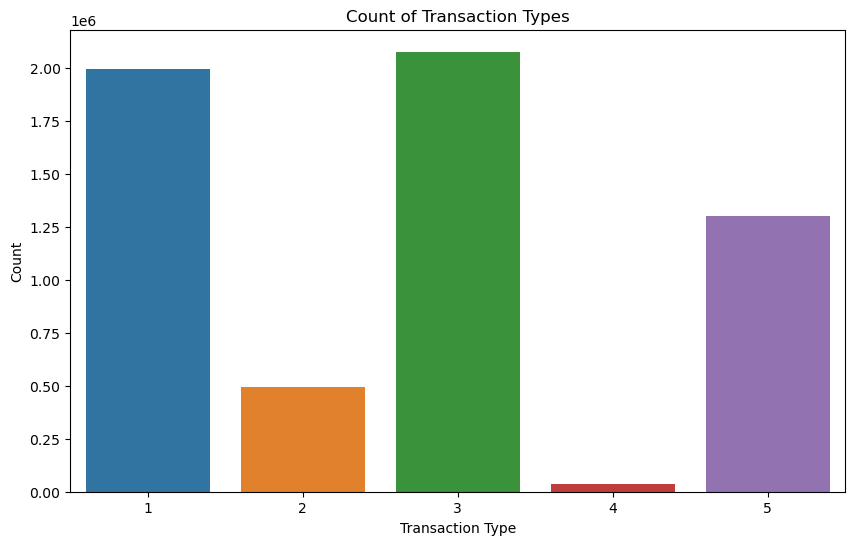

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=data)
plt.title('Count of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

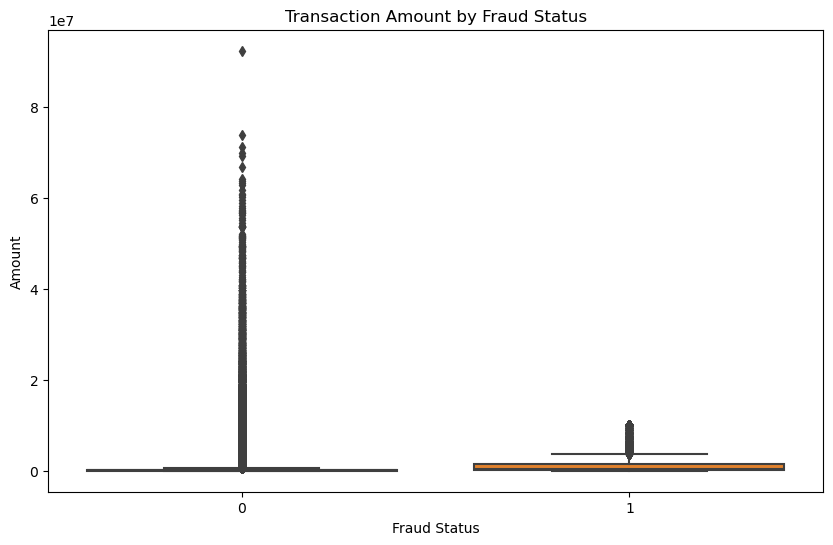

In [69]:
# Boxplot of transaction amount by fraud status
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_transaction', y='amount', data=data)
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Amount')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='bal_before_transaction', y='bal_after_transaction', hue='fraud_transaction', data=data) 
plt.title('before transaction vs. after transaction (Origin)') 
plt.xlabel('before transaction (Origin)') 
plt.ylabel('after transaction (Origin)') 
plt.show()

In [ ]:
# create a function that properly labels isFraud

def Fraud (x):
    if x ==1:
        return "Fraudulent"
    else:
        return "not Fraudulent"
    
# create a new column
data["fraud_transaction_label"] = data["fraud_transaction"].apply(Fraud)

In [ ]:
data.drop(columns=['step','isFlaggedFraud', 'customer_starting_transaction', 'recipient_of_transaction','fraud_transaction_label'], inplace=True)

In [ ]:
data.head()

In [ ]:
#heatmap
data_plot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [ ]:
data.corr()

Splitting the dataset & Feature scalling

In [ ]:

y = data['fraud_transaction']
x = data.drop('fraud_transaction', axis=1)
features = list(x.columns)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
return x_train, x_test, y_train, y_test, features

In [ ]:
x_train, x_test, y_train, y_test, features = train_test_split_scale(data)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
def fit_evaluate(x_train,x_test, y_train, y_test, class_weight = None):
    lr = LogisticRegression(class_weight = class_weight)
    model = lr.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)
    print("Training Accuracy of the Model",accuracy_score(y_train, y_pred_train))
    print("Testing Accuracy of the Model",accuracy_score(y_test, y_pred))
    print("Testing Recall of the Model",recall_score(y_test, y_pred))
    print("Testing Precision of the Model",precision_score(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix", conf_matrix)
    print("Classification Report",classification_report(y_test, y_pred))
    return model


Fit and evaluate the model

In [ ]:
lr = LogisticRegression()
model = lr.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
conf_matrix

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
fit_evaluate(x_train,x_test, y_train, y_test,class_weight = None)

In [ ]:
import pickle as pkl

In [ ]:
pkl.dump(model,open('UPIfraud.pkl','wb'))

In [ ]:
pkl.dump(scaler,open('scaler.pkl','wb'))